## This script reads CESM2 Discharge data downloaded from Casper in NCAR (Figure 4)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime

import xarray as xr
import seaborn as sns
import warnings
from matplotlib import pyplot as plt 


## Read Lat, Lon data for the selected Domain processed from "GLADE" in Casper

### Lat

In [2]:
file_LatUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/latsUsArr.npy'
#file_LatUs = 'https://github.com/rezaulg/CESM2-projection-Mississippi-discharge/blob/main/latsUsArr.npy'

lats_US = np.load(file_LatUs)
print(lats_US.shape)
print(lats_US)

(60,)
[24.75 25.25 25.75 26.25 26.75 27.25 27.75 28.25 28.75 29.25 29.75 30.25
 30.75 31.25 31.75 32.25 32.75 33.25 33.75 34.25 34.75 35.25 35.75 36.25
 36.75 37.25 37.75 38.25 38.75 39.25 39.75 40.25 40.75 41.25 41.75 42.25
 42.75 43.25 43.75 44.25 44.75 45.25 45.75 46.25 46.75 47.25 47.75 48.25
 48.75 49.25 49.75 50.25 50.75 51.25 51.75 52.25 52.75 53.25 53.75 54.25]


### Lon

In [3]:
file_LonUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/lonsUsArr.npy'
lons_US = np.load(file_LonUs)
print(lons_US.shape)
print(lons_US)

(140,)
[-130.25 -129.75 -129.25 -128.75 -128.25 -127.75 -127.25 -126.75 -126.25
 -125.75 -125.25 -124.75 -124.25 -123.75 -123.25 -122.75 -122.25 -121.75
 -121.25 -120.75 -120.25 -119.75 -119.25 -118.75 -118.25 -117.75 -117.25
 -116.75 -116.25 -115.75 -115.25 -114.75 -114.25 -113.75 -113.25 -112.75
 -112.25 -111.75 -111.25 -110.75 -110.25 -109.75 -109.25 -108.75 -108.25
 -107.75 -107.25 -106.75 -106.25 -105.75 -105.25 -104.75 -104.25 -103.75
 -103.25 -102.75 -102.25 -101.75 -101.25 -100.75 -100.25  -99.75  -99.25
  -98.75  -98.25  -97.75  -97.25  -96.75  -96.25  -95.75  -95.25  -94.75
  -94.25  -93.75  -93.25  -92.75  -92.25  -91.75  -91.25  -90.75  -90.25
  -89.75  -89.25  -88.75  -88.25  -87.75  -87.25  -86.75  -86.25  -85.75
  -85.25  -84.75  -84.25  -83.75  -83.25  -82.75  -82.25  -81.75  -81.25
  -80.75  -80.25  -79.75  -79.25  -78.75  -78.25  -77.75  -77.25  -76.75
  -76.25  -75.75  -75.25  -74.75  -74.25  -73.75  -73.25  -72.75  -72.25
  -71.75  -71.25  -70.75  -70.25  -69.75  -6

## Historical years and 3 time periods (i.e., Era) in Scenario years

In [4]:
histYrSelSt = 1930

refPeriodYrSt = 1971
refPeriodYrEnd = 2000

scenYrSt = 2015
scenEraTwoYrSt = 2045
scenEraThreeYrSt = 2075

scenYrEnd = 2100
#

In [5]:
nYrsHistSelScen = scenYrEnd - histYrSelSt + 1
print(nYrsHistSelScen)

171


In [6]:
nMonsPerYr = 12     
print(nMonsPerYr)

12


## Reference Period

In [7]:
refPeriodStepSt = (refPeriodYrSt - histYrSelSt)*1
refPeriodStepEnd = (refPeriodYrEnd - histYrSelSt + 1)*1
print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

41 71
30


## Era1

In [8]:
scenEraOneStepSt = (scenYrSt - histYrSelSt)*1
scenEraOneStepEnd = (scenEraTwoYrSt - histYrSelSt)*1
print(scenEraOneStepSt, scenEraOneStepEnd)
print(scenEraOneStepEnd-scenEraOneStepSt)

85 115
30


## Era2

In [9]:
scenEraTwoStepSt = (scenEraTwoYrSt - histYrSelSt)*1
scenEraTwoStepEnd = (scenEraThreeYrSt - histYrSelSt)*1

print(scenEraTwoStepSt, scenEraTwoStepEnd)
print(scenEraTwoStepEnd-scenEraTwoStepSt)

115 145
30


## Era3

In [10]:
scenEraThreeStepSt = (scenEraThreeYrSt - histYrSelSt)*1
scenEraThreeStepEnd = (scenYrEnd - histYrSelSt + 1)*1
print(scenEraThreeStepSt, scenEraThreeStepEnd)
print(scenEraThreeStepEnd-scenEraThreeStepSt)

145 171
26


## Formatting X-axis ticks for plotting purpose

In [11]:
histYrSelSt = 1930
scenYrEnd = 2100

timeList = []
for yr in range(histYrSelSt, scenYrEnd+1):  
    
    yMD = datetime.datetime(yr,1,1)    
    timeList.append(yMD)                   
                        
timeListDf = pd.DataFrame(timeList)

timeListDf.columns = ['t1']
timeListDf


,t1
0,1930-01-01
1,1931-01-01
2,1932-01-01
3,1933-01-01
4,1934-01-01
...,...
166,2096-01-01
167,2097-01-01
168,2098-01-01
169,2099-01-01


In [12]:
yMD = timeListDf['t1'].dt.strftime('%Y').sort_values()
multiple = 20

multiple = np.ceil(multiple)
timeTickLebels = yMD[yMD.index % multiple == 0]
timeTicks = yMD.index[yMD.index % multiple == 0]
timeTicks


Int64Index([0, 20, 40, 60, 80, 100, 120, 140, 160], dtype='int64')

In [13]:
print(timeTicks.shape)
print(timeTickLebels)

(9,)
0      1930
20     1950
40     1970
60     1990
80     2010
100    2030
120    2050
140    2070
160    2090
Name: t1, dtype: object


## Color for plotting

In [14]:
width = 0.5  # the width of the bars

my_colors = ["green", "blue", 
             "orange", "red"]
sns.set_palette( my_colors )

## Using Monthly Data (HistSel + Scen) for the US domain from Ensemble Members

In [15]:
file_histSel_Us_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/monDischUsHistSelEnsMean.npy'
file_histSel_Us_ensMean_loaded = np.load(file_histSel_Us_ensMean)
print(file_histSel_Us_ensMean_loaded.shape)
maxVal = np.nanmax(file_histSel_Us_ensMean_loaded)
maxVal

(1020, 60, 140)


1.0000000000000002e+36

In [16]:
file_scen_Us_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/monDischUsScenEnsMean.npy'
file_scen_Us_ensMean_loaded = np.load(file_scen_Us_ensMean)
print(file_scen_Us_ensMean_loaded.shape)
maxVal = np.nanmax(file_scen_Us_ensMean_loaded)
maxVal

(1032, 60, 140)


1.0000000000000002e+36

## Concatenate two data arrays

In [17]:
disch_histSel_scen_Us_ensMean = np.concatenate((file_histSel_Us_ensMean_loaded, file_scen_Us_ensMean_loaded), axis=0)
print(disch_histSel_scen_Us_ensMean.shape)

(2052, 60, 140)


## Extracting discharge values at different outlet points 

### Coordinates

In [18]:
# Missouri at Hermann
latTrgt_MissouriHermann = 38.71
lonTrgt_MissouriHermann = -91.44

# Arkansas at Murray Dam near Little Rock
latTrgt_ArkansasMurrayLittleRock = 34.79
lonTrgt_ArkansasMurrayLittleRock = -92.36

# Ohio at Olmsted
latTrgt_OhioOlmsted = 37.18
lonTrgt_OhioOlmsted = -89.06

# Mississippi at Vicksburg
latTrgt_MissiVicks = 32.32
lonTrgt_MissiVicks = -90.91


In [19]:
# Missouri at Hermann
latTrgtIndex_MissouriHermann = np.argmin( np.abs(lats_US - latTrgt_MissouriHermann))
lonTrgtIndex_MissouriHermann = np.argmin( np.abs(lons_US - lonTrgt_MissouriHermann))
print(latTrgtIndex_MissouriHermann, lonTrgtIndex_MissouriHermann)

# Arkansas at Murray Dam near Little Rock
latTrgtIndex_ArkansasMurrayLittleRock = np.argmin( np.abs(lats_US - latTrgt_ArkansasMurrayLittleRock))
lonTrgtIndex_ArkansasMurrayLittleRock = np.argmin( np.abs(lons_US - lonTrgt_ArkansasMurrayLittleRock))
print(latTrgtIndex_ArkansasMurrayLittleRock, lonTrgtIndex_ArkansasMurrayLittleRock)

# Ohio at Olmsted
latTrgtIndex_OhioOlmsted = np.argmin( np.abs(lats_US - latTrgt_OhioOlmsted))
lonTrgtIndex_OhioOlmsted = np.argmin( np.abs(lons_US - lonTrgt_OhioOlmsted))
print(latTrgtIndex_OhioOlmsted, lonTrgtIndex_OhioOlmsted)

# Mississippi at Vicksburg
latTrgtIndex_MissiVicks = np.argmin( np.abs(lats_US - latTrgt_MissiVicks))
lonTrgtIndex_MissiVicks = np.argmin( np.abs(lons_US - lonTrgt_MissiVicks))
print(latTrgtIndex_MissiVicks, lonTrgtIndex_MissiVicks)


28 78
20 76
25 82
15 79


## Missouri at Hermann

In [20]:
print(disch_histSel_scen_Us_ensMean.shape)

(2052, 60, 140)


In [21]:
#disch_histSel_scen_ensMems_MissouriHermann = disch_histSel_scen_Us_ensMems[:, latTrgtIndex_MissouriHermann, lonTrgtIndex_MissouriHermann, :]
disch_histSel_scen_ensMean_MissouriHermann = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_MissouriHermann, lonTrgtIndex_MissouriHermann]
print(disch_histSel_scen_ensMean_MissouriHermann.shape)

#disch_histSel_scen_ensMean_MissouriHermann = np.nanmean(disch_histSel_scen_ensMems_MissouriHermann, axis =1)
#print(disch_histSel_scen_ensMean_MissouriHermann.shape)

disch_histSel_scen_ensMean_Yr_MissouriHermann = np.reshape(disch_histSel_scen_ensMean_MissouriHermann,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_MissouriHermann.shape)

disch_yrMean_histSel_scen_ensMean_MissouriHermannArr = np.nanmean(disch_histSel_scen_ensMean_Yr_MissouriHermann, axis = 1)
print(disch_yrMean_histSel_scen_ensMean_MissouriHermannArr.shape)


(2052,)
(171, 12)
(171,)


### Sub-setting the time series into historical reference and 3 time periods in the 21st century

In [22]:
disch_yrMean_refPeriod_ensMean_MissouriHermannArr = disch_yrMean_histSel_scen_ensMean_MissouriHermannArr[refPeriodStepSt:refPeriodStepEnd]
print(disch_yrMean_refPeriod_ensMean_MissouriHermannArr.shape)

disch_yrMean_eraOne_ensMean_MissouriHermannArr = disch_yrMean_histSel_scen_ensMean_MissouriHermannArr[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_yrMean_eraOne_ensMean_MissouriHermannArr.shape)

disch_yrMean_eraTwo_ensMean_MissouriHermannArr = disch_yrMean_histSel_scen_ensMean_MissouriHermannArr[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_yrMean_eraTwo_ensMean_MissouriHermannArr.shape)

disch_yrMean_eraThree_ensMean_MissouriHermannArr = disch_yrMean_histSel_scen_ensMean_MissouriHermannArr[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_yrMean_eraThree_ensMean_MissouriHermannArr.shape)

(30,)
(30,)
(30,)
(26,)


### Percent change calculation

In [23]:

disch_yrMean_refPeriodMean_ensMean_MissouriHermannArr = np.nanmean(disch_yrMean_refPeriod_ensMean_MissouriHermannArr)
print(disch_yrMean_refPeriodMean_ensMean_MissouriHermannArr)
print('')

disch_yrMeanPercCh_histSel_scen_ensMean_MissouriHermannArr = (disch_yrMean_histSel_scen_ensMean_MissouriHermannArr - disch_yrMean_refPeriodMean_ensMean_MissouriHermannArr)/disch_yrMean_refPeriodMean_ensMean_MissouriHermannArr*100
print(disch_yrMeanPercCh_histSel_scen_ensMean_MissouriHermannArr.shape)
print('')

disch_yrMeanPercCh_eraOne_ensMean_MissouriHermannArr = disch_yrMeanPercCh_histSel_scen_ensMean_MissouriHermannArr[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_yrMeanPercCh_eraOne_ensMean_MissouriHermannArr.shape)

disch_yrMeanPercCh_eraTwo_ensMean_MissouriHermannArr = disch_yrMeanPercCh_histSel_scen_ensMean_MissouriHermannArr[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_yrMeanPercCh_eraTwo_ensMean_MissouriHermannArr.shape)

disch_yrMeanPercCh_eraThree_ensMean_MissouriHermannArr = disch_yrMeanPercCh_histSel_scen_ensMean_MissouriHermannArr[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_yrMeanPercCh_eraThree_ensMean_MissouriHermannArr.shape)

4269.254595404186

(171,)

(30,)
(30,)
(26,)


## Arkansas at Murray Dam near Little Rock

In [24]:
disch_histSel_scen_ensMean_ArkansasMurrayLittleRock = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_ArkansasMurrayLittleRock, lonTrgtIndex_ArkansasMurrayLittleRock]
print(disch_histSel_scen_ensMean_ArkansasMurrayLittleRock.shape)

#disch_histSel_scen_ensMean_ArkansasMurrayLittleRock = np.nanmean(disch_histSel_scen_ensMems_ArkansasMurrayLittleRock, axis =1)
#print(disch_histSel_scen_ensMean_ArkansasMurrayLittleRock.shape)

disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock = np.reshape(disch_histSel_scen_ensMean_ArkansasMurrayLittleRock,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock.shape)

disch_yrMean_histSel_scen_ensMean_ArkansasMurrayLittleRockArr = np.nanmean(disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock, axis = 1)
print(disch_yrMean_histSel_scen_ensMean_ArkansasMurrayLittleRockArr.shape)


(2052,)
(171, 12)
(171,)


### Sub-setting the time series into historical reference and 3 time periods in the 21st century

In [25]:
disch_yrMean_refPeriod_ensMean_ArkansasMurrayLittleRockArr = disch_yrMean_histSel_scen_ensMean_ArkansasMurrayLittleRockArr[refPeriodStepSt:refPeriodStepEnd]
print(disch_yrMean_refPeriod_ensMean_ArkansasMurrayLittleRockArr.shape)

disch_yrMean_eraOne_ensMean_ArkansasMurrayLittleRockArr = disch_yrMean_histSel_scen_ensMean_ArkansasMurrayLittleRockArr[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_yrMean_eraOne_ensMean_ArkansasMurrayLittleRockArr.shape)

disch_yrMean_eraTwo_ensMean_ArkansasMurrayLittleRockArr = disch_yrMean_histSel_scen_ensMean_ArkansasMurrayLittleRockArr[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_yrMean_eraTwo_ensMean_ArkansasMurrayLittleRockArr.shape)

disch_yrMean_eraThree_ensMean_ArkansasMurrayLittleRockArr = disch_yrMean_histSel_scen_ensMean_ArkansasMurrayLittleRockArr[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_yrMean_eraThree_ensMean_ArkansasMurrayLittleRockArr.shape)

(30,)
(30,)
(30,)
(26,)


### Percent change calculation

In [26]:
disch_yrMean_refPeriodMean_ensMean_ArkansasMurrayLittleRockArr = np.nanmean(disch_yrMean_refPeriod_ensMean_ArkansasMurrayLittleRockArr)
print(disch_yrMean_refPeriodMean_ensMean_ArkansasMurrayLittleRockArr)
print('')

disch_yrMeanPercCh_histSel_scen_ensMean_ArkansasMurrayLittleRockArr = (disch_yrMean_histSel_scen_ensMean_ArkansasMurrayLittleRockArr - disch_yrMean_refPeriodMean_ensMean_ArkansasMurrayLittleRockArr)/disch_yrMean_refPeriodMean_ensMean_ArkansasMurrayLittleRockArr*100
print(disch_yrMeanPercCh_histSel_scen_ensMean_ArkansasMurrayLittleRockArr.shape)
print('')

disch_yrMeanPercCh_eraOne_ensMean_ArkansasMurrayLittleRockArr = disch_yrMeanPercCh_histSel_scen_ensMean_ArkansasMurrayLittleRockArr[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_yrMeanPercCh_eraOne_ensMean_ArkansasMurrayLittleRockArr.shape)

disch_yrMeanPercCh_eraTwo_ensMean_ArkansasMurrayLittleRockArr = disch_yrMeanPercCh_histSel_scen_ensMean_ArkansasMurrayLittleRockArr[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_yrMeanPercCh_eraTwo_ensMean_ArkansasMurrayLittleRockArr.shape)

disch_yrMeanPercCh_eraThree_ensMean_ArkansasMurrayLittleRockArr = disch_yrMeanPercCh_histSel_scen_ensMean_ArkansasMurrayLittleRockArr[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_yrMeanPercCh_eraThree_ensMean_ArkansasMurrayLittleRockArr.shape)

1798.0349709062723

(171,)

(30,)
(30,)
(26,)


## Ohio River at Olmsted

In [27]:
disch_histSel_scen_ensMean_OhioOlmsted = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_OhioOlmsted, lonTrgtIndex_OhioOlmsted]
print(disch_histSel_scen_ensMean_OhioOlmsted.shape)

#disch_histSel_scen_ensMean_OhioOlmsted = np.nanmean(disch_histSel_scen_ensMems_OhioOlmsted, axis =1)
#print(disch_histSel_scen_ensMean_OhioOlmsted.shape)

disch_histSel_scen_ensMean_Yr_OhioOlmsted = np.reshape(disch_histSel_scen_ensMean_OhioOlmsted,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_OhioOlmsted.shape)

disch_yrMean_histSel_scen_ensMean_OhioOlmstedArr = np.nanmean(disch_histSel_scen_ensMean_Yr_OhioOlmsted, axis = 1)
print(disch_yrMean_histSel_scen_ensMean_OhioOlmstedArr.shape)


(2052,)
(171, 12)
(171,)


### Sub-setting the time series into historical reference and 3 time periods in the 21st century

In [28]:
disch_yrMean_refPeriod_ensMean_OhioOlmstedArr = disch_yrMean_histSel_scen_ensMean_OhioOlmstedArr[refPeriodStepSt:refPeriodStepEnd]
print(disch_yrMean_refPeriod_ensMean_OhioOlmstedArr.shape)

disch_yrMean_eraOne_ensMean_OhioOlmstedArr = disch_yrMean_histSel_scen_ensMean_OhioOlmstedArr[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_yrMean_eraOne_ensMean_OhioOlmstedArr.shape)

disch_yrMean_eraTwo_ensMean_OhioOlmstedArr = disch_yrMean_histSel_scen_ensMean_OhioOlmstedArr[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_yrMean_eraTwo_ensMean_OhioOlmstedArr.shape)

disch_yrMean_eraThree_ensMean_OhioOlmstedArr = disch_yrMean_histSel_scen_ensMean_OhioOlmstedArr[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_yrMean_eraThree_ensMean_OhioOlmstedArr.shape)

(30,)
(30,)
(30,)
(26,)


### Percent change calculation

In [29]:
disch_yrMean_refPeriodMean_ensMean_OhioOlmstedArr = np.nanmean(disch_yrMean_refPeriod_ensMean_OhioOlmstedArr)
print(disch_yrMean_refPeriodMean_ensMean_OhioOlmstedArr)
print('')

disch_yrMeanPercCh_histSel_scen_ensMean_OhioOlmstedArr = (disch_yrMean_histSel_scen_ensMean_OhioOlmstedArr - disch_yrMean_refPeriodMean_ensMean_OhioOlmstedArr)/disch_yrMean_refPeriodMean_ensMean_OhioOlmstedArr*100
print(disch_yrMeanPercCh_histSel_scen_ensMean_OhioOlmstedArr.shape)
print('')

disch_yrMeanPercCh_eraOne_ensMean_OhioOlmstedArr = disch_yrMeanPercCh_histSel_scen_ensMean_OhioOlmstedArr[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_yrMeanPercCh_eraOne_ensMean_OhioOlmstedArr.shape)

disch_yrMeanPercCh_eraTwo_ensMean_OhioOlmstedArr = disch_yrMeanPercCh_histSel_scen_ensMean_OhioOlmstedArr[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_yrMeanPercCh_eraTwo_ensMean_OhioOlmstedArr.shape)

disch_yrMeanPercCh_eraThree_ensMean_OhioOlmstedArr = disch_yrMeanPercCh_histSel_scen_ensMean_OhioOlmstedArr[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_yrMeanPercCh_eraThree_ensMean_OhioOlmstedArr.shape)

7890.239422232165

(171,)

(30,)
(30,)
(26,)


## Mississippi at Vicksburg

In [30]:
disch_histSel_scen_ensMean_MissiVicks = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_MissiVicks, lonTrgtIndex_MissiVicks]
print(disch_histSel_scen_ensMean_MissiVicks.shape)

#disch_histSel_scen_ensMean_MissiVicks = np.nanmean(disch_histSel_scen_ensMems_MissiVicks, axis =1)
#print(disch_histSel_scen_ensMean_MissiVicks.shape)

disch_histSel_scen_ensMean_Yr_MissiVicks=np.reshape(disch_histSel_scen_ensMean_MissiVicks,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_MissiVicks.shape)

disch_yrMean_histSel_scen_ensMean_MissiVicksArr = np.nanmean(disch_histSel_scen_ensMean_Yr_MissiVicks, axis = 1)
print(disch_yrMean_histSel_scen_ensMean_MissiVicksArr.shape)

(2052,)
(171, 12)
(171,)


### Sub-setting the time series into historical reference and 3 time periods in the 21st century

In [31]:
disch_yrMean_refPeriod_ensMean_MissiVicksArr = disch_yrMean_histSel_scen_ensMean_MissiVicksArr[refPeriodStepSt:refPeriodStepEnd]
print(disch_yrMean_refPeriod_ensMean_MissiVicksArr.shape)

disch_yrMean_eraOne_ensMean_MissiVicksArr = disch_yrMean_histSel_scen_ensMean_MissiVicksArr[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_yrMean_eraOne_ensMean_MissiVicksArr.shape)

disch_yrMean_eraTwo_ensMean_MissiVicksArr = disch_yrMean_histSel_scen_ensMean_MissiVicksArr[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_yrMean_eraTwo_ensMean_MissiVicksArr.shape)

disch_yrMean_eraThree_ensMean_MissiVicksArr = disch_yrMean_histSel_scen_ensMean_MissiVicksArr[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_yrMean_eraThree_ensMean_MissiVicksArr.shape)

(30,)
(30,)
(30,)
(26,)


### Percent change calculation

In [32]:
disch_yrMean_refPeriodMean_ensMean_MissiVicksArr = np.nanmean(disch_yrMean_refPeriod_ensMean_MissiVicksArr)
print(disch_yrMean_refPeriodMean_ensMean_MissiVicksArr)
print('')

disch_yrMeanPercCh_histSel_scen_ensMean_MissiVicksArr = (disch_yrMean_histSel_scen_ensMean_MissiVicksArr - disch_yrMean_refPeriodMean_ensMean_MissiVicksArr)/disch_yrMean_refPeriodMean_ensMean_MissiVicksArr*100
print(disch_yrMeanPercCh_histSel_scen_ensMean_MissiVicksArr.shape)
print('')

disch_yrMeanPercCh_eraOne_ensMean_MissiVicksArr = disch_yrMeanPercCh_histSel_scen_ensMean_MissiVicksArr[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_yrMeanPercCh_eraOne_ensMean_MissiVicksArr.shape)

disch_yrMeanPercCh_eraTwo_ensMean_MissiVicksArr = disch_yrMeanPercCh_histSel_scen_ensMean_MissiVicksArr[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_yrMeanPercCh_eraTwo_ensMean_MissiVicksArr.shape)

disch_yrMeanPercCh_eraThree_ensMean_MissiVicksArr = disch_yrMeanPercCh_histSel_scen_ensMean_MissiVicksArr[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_yrMeanPercCh_eraThree_ensMean_MissiVicksArr.shape)


22716.041475665006

(171,)

(30,)
(30,)
(26,)


## Box plot for Percent Change of discharge

In [33]:
dfBasinOutletsDischPercChEraOne=pd.DataFrame(np.zeros((30,4)), columns=['Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2015-2044')

dfBasinOutletsDischPercChEraOne.Missouri = disch_yrMeanPercCh_eraOne_ensMean_MissouriHermannArr
dfBasinOutletsDischPercChEraOne.Arkansas = disch_yrMeanPercCh_eraOne_ensMean_ArkansasMurrayLittleRockArr
dfBasinOutletsDischPercChEraOne.Ohio = disch_yrMeanPercCh_eraOne_ensMean_OhioOlmstedArr
dfBasinOutletsDischPercChEraOne.Lower_Mississippi = disch_yrMeanPercCh_eraOne_ensMean_MissiVicksArr
print(dfBasinOutletsDischPercChEraOne.shape)
dfBasinOutletsDischPercChEraOne.head()

(30, 5)


,Missouri,Arkansas,Ohio,Lower_Mississippi,Years
0,-4.294282,-9.410520,-0.126619,-1.376296,2015-2044
1,-6.925732,-10.283984,-2.568608,-1.592425,2015-2044
2,-3.440986,-7.595961,-0.294015,0.720871,2015-2044
3,-7.736517,-15.796082,-3.159295,-4.290647,2015-2044
4,-5.858875,-9.923605,-4.211025,-3.585185,2015-2044


In [34]:
dfBasinOutletsDischPercChEraTwo=pd.DataFrame(np.zeros((30,4)), columns=['Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2045-2074')

dfBasinOutletsDischPercChEraTwo.Missouri = disch_yrMeanPercCh_eraTwo_ensMean_MissouriHermannArr
dfBasinOutletsDischPercChEraTwo.Arkansas = disch_yrMeanPercCh_eraTwo_ensMean_ArkansasMurrayLittleRockArr
dfBasinOutletsDischPercChEraTwo.Ohio = disch_yrMeanPercCh_eraTwo_ensMean_OhioOlmstedArr
dfBasinOutletsDischPercChEraTwo.Lower_Mississippi = disch_yrMeanPercCh_eraTwo_ensMean_MissiVicksArr
print(dfBasinOutletsDischPercChEraTwo.shape)
dfBasinOutletsDischPercChEraTwo.head()

(30, 5)


,Missouri,Arkansas,Ohio,Lower_Mississippi,Years
0,-10.196489,-7.981327,-4.654558,-1.655141,2045-2074
1,-7.180363,-2.578812,-1.667043,2.666870,2045-2074
2,-4.771350,-3.813319,0.481565,5.013183,2045-2074
3,-8.714299,-12.037721,-2.979918,0.712535,2045-2074
4,-10.117654,-15.216727,-4.013493,-2.546035,2045-2074


In [35]:
dfBasinOutletsDischPercChEraThree=pd.DataFrame(np.zeros((26,4)), columns=['Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2075-2100')

dfBasinOutletsDischPercChEraThree.Missouri = disch_yrMeanPercCh_eraThree_ensMean_MissouriHermannArr
dfBasinOutletsDischPercChEraThree.Arkansas = disch_yrMeanPercCh_eraThree_ensMean_ArkansasMurrayLittleRockArr
dfBasinOutletsDischPercChEraThree.Ohio = disch_yrMeanPercCh_eraThree_ensMean_OhioOlmstedArr
dfBasinOutletsDischPercChEraThree.Lower_Mississippi = disch_yrMeanPercCh_eraThree_ensMean_MissiVicksArr
print(dfBasinOutletsDischPercChEraThree.shape)
dfBasinOutletsDischPercChEraThree.head()

(26, 5)


,Missouri,Arkansas,Ohio,Lower_Mississippi,Years
0,-3.009642,-0.892219,4.957406,8.644521,2075-2100
1,-3.811594,-6.584119,4.319976,5.860764,2075-2100
2,-6.055346,-4.474756,-0.675406,6.460466,2075-2100
3,-3.144177,-5.179378,3.045515,7.778175,2075-2100
4,-0.418521,-0.516171,6.263382,9.668958,2075-2100


In [36]:
cdfBasinOutletsDischPercChEras = pd.concat([dfBasinOutletsDischPercChEraOne, dfBasinOutletsDischPercChEraTwo, dfBasinOutletsDischPercChEraThree ])    
mdfBasinOutletsDischPercChEras = pd.melt(cdfBasinOutletsDischPercChEras, id_vars=['Years'], var_name=['Basins'], value_name="Percent_change") 
print(mdfBasinOutletsDischPercChEras.head())
mdfBasinOutletsDischPercChEras

       Years    Basins  Percent_change
0  2015-2044  Missouri       -4.294282
1  2015-2044  Missouri       -6.925732
2  2015-2044  Missouri       -3.440986
3  2015-2044  Missouri       -7.736517
4  2015-2044  Missouri       -5.858875


,Years,Basins,Percent_change
0,2015-2044,Missouri,-4.294282
1,2015-2044,Missouri,-6.925732
2,2015-2044,Missouri,-3.440986
3,2015-2044,Missouri,-7.736517
4,2015-2044,Missouri,-5.858875
...,...,...,...
339,2075-2100,Lower_Mississippi,12.437619
340,2075-2100,Lower_Mississippi,16.031288
341,2075-2100,Lower_Mississippi,11.490074
342,2075-2100,Lower_Mississippi,10.720358


In [37]:
print(mdfBasinOutletsDischPercChEras.shape)

(344, 3)


## Figure Formatting

<ipython-input-38-71449dd08c1d>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.xaxis.set_major_formatter(plt.FixedFormatter(yMD))


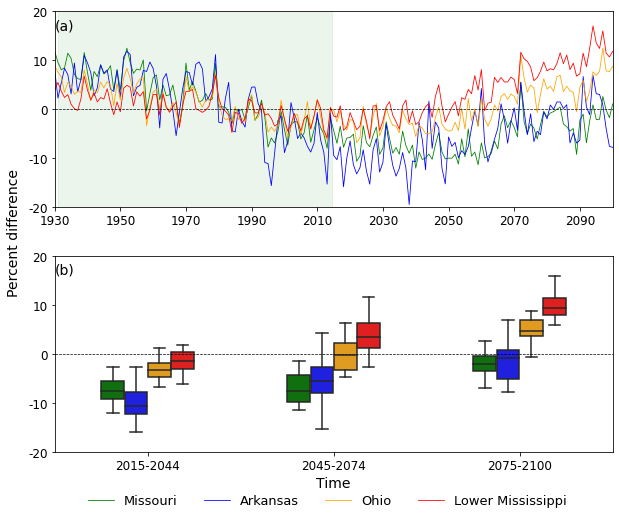

In [38]:
#%matplotlib notebook

tickFontSize = 12
textFontSize = 14
legendFontSize = 13
titleFontSize = 14

linewidth = 0.8
dashLinewidth = 0.7

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

fig = plt.figure(figsize=(10, 9), constrained_layout=False)
axs = [plt.subplot(2, 1, x + 1,) for x in range(2)]

ax1 = axs[0]

ln11=ax1.plot(range(171), disch_yrMeanPercCh_histSel_scen_ensMean_MissouriHermannArr, label="Missouri", color = 'green', linestyle='-', linewidth=linewidth)
ln12=ax1.plot(range(171), disch_yrMeanPercCh_histSel_scen_ensMean_ArkansasMurrayLittleRockArr, label="Arkansas", color = 'blue', linestyle='-', linewidth=linewidth)
ln13=ax1.plot(range(171), disch_yrMeanPercCh_histSel_scen_ensMean_OhioOlmstedArr, label="Ohio", color = 'orange', linestyle='-', linewidth=linewidth)
ln14=ax1.plot(range(171), disch_yrMeanPercCh_histSel_scen_ensMean_MissiVicksArr, label="Lower Mississippi", color = 'red', linestyle='-', linewidth=linewidth)
ln15=ax1.axvspan(1, 84.5, color='C0',alpha=0.075, )
ln15=ax1.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)
ax1.set_title('(a)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax1.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax1.set_xticks(timeTicks)
ax1.set_xticklabels(timeTickLebels, minor=False)

ax1.set_xlim([0, 170])
ax1.set_ylim([-20, 20])

ax1.set_yticks([-20, -10, 0, 10, 20 ],)
ax1.set_yticklabels(['-20', '-10', '0', '10', '20' ],fontsize=tickFontSize)

ax1.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax1.set_xticks(timeTicks)
ax1.set_xticklabels(timeTickLebels, minor=False, fontsize=tickFontSize, rotation=0)
ax1.set_ylabel('Percent difference', fontsize=textFontSize)

ax1.yaxis.set_label_coords(-0.06, -0.13)
ax1.legend(ncol=5, loc=(+0.05, -1.56),frameon=False, fontsize=legendFontSize)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax2 = axs[1]
ln21 = sns.boxplot(x="Years", y="Percent_change", hue="Basins", data=mdfBasinOutletsDischPercChEras,ax=ax2, width = width, showfliers = False) # RUN PLOT 
ax2.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)
ax2.get_legend().remove()
ax2.set_xticklabels(['2015-2044', '2045-2074', '2075-2100',],fontsize=tickFontSize)
plt.ylabel('')
ax2.set_yticks([-20, -10, 0, 10, 20 ],)
ax2.set_yticklabels(['-20',  '-10',  '0', '10',  '20' ],fontsize=tickFontSize)
ax2.set_xlabel('Time', fontsize=textFontSize)
ax2.set_title('(b)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

plt.subplots_adjust(hspace=0.25, bottom=0.2)



'''
plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\disch\anom\anomDisch.pdf')  
plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\disch\anom\anomDisch.png', dpi=600)  
plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\disch\anom\anomDisch.svg', dpi=1200) 

'''

plt.show()


## Satistics

In [39]:

maxValOhio = np.nanmax(disch_yrMeanPercCh_histSel_scen_ensMean_OhioOlmstedArr)
print(maxValOhio)
print('')

maxValMissiVicks = np.nanmax(disch_yrMeanPercCh_histSel_scen_ensMean_MissiVicksArr)
print(maxValMissiVicks)

12.492624122397165

17.04538030996904


In [40]:
STOP here ============

SyntaxError: invalid syntax (<ipython-input-40-76345b92dc7b>, line 1)